In [1]:
import pandas as pd

In [2]:
from datetime import datetime, time

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#importing the DF and formatting the Date column
accidents=pd.read_csv("DATAFrames/global_traffic_accidents.csv", parse_dates=["Date"])

In [6]:
#Displaying the DF
accidents

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving
...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving
9996,4d236cfd,2023-04-04,16:48,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions
9997,1d32722f,2024-09-30,14:43,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions
9998,64722572,2024-10-27,18:34,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving


#Doesn't seems to have a very strong correlation between the day of the week and numbers of accidents

In [8]:
#looking for a relation between day of the week and number of accidents (No evident relation)
accidents["Date"].dt.dayofweek.value_counts()

Date
1    1451
4    1449
5    1446
6    1439
3    1439
0    1395
2    1381
Name: count, dtype: int64

In [9]:
#make a new column containing only the countries by splitting it at the coma between country and city
accidents["Countries"]=accidents["Location"].str.split(",", expand=True)[1]

In [10]:
#Finding the list of different countries in the dataframe
accidents["Countries"].unique()

array([' India', ' Brazil', ' Australia', ' Japan', ' China', ' France',
       ' UK', ' Canada', ' Germany', ' USA'], dtype=object)

In [11]:
#Changing the country names to make them simpler and removing the space before the country name
accidents["Countries"]=accidents["Countries"].replace([' India', ' Brazil', ' Australia', ' Japan', ' China', ' France',
       ' UK', ' Canada', ' Germany', ' USA'],["IND","BRA","AUS","JPN","CHI","FRA","UK","CAN","GER","USA"])

In [12]:
#Finding which country had the most amount of accidents in 2023
numbers_of_accidents=accidents["Countries"].value_counts().sort_index()

In [13]:
#maybe the ratio with the population of these countries at that time would be necessary to have a valid data.
numbers_of_accidents

Countries
AUS    1006
BRA    1032
CAN    1003
CHI    1014
FRA     995
GER     958
IND     987
JPN     989
UK     1000
USA    1016
Name: count, dtype: int64

Need population in the year 2023

In [15]:
accidents["Date"].sort_values()

3958   2023-01-01
8335   2023-01-01
358    2023-01-01
7701   2023-01-01
8539   2023-01-01
          ...    
6827   2024-12-31
4776   2024-12-31
3547   2024-12-31
3787   2024-12-31
9039   2024-12-31
Name: Date, Length: 10000, dtype: datetime64[ns]

In [16]:
population=pd.read_csv("DATAFrames/world_population_data.csv")

In [17]:
population

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.00,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.00,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.00,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.00,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.00,312,1.98%,3.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%


In [18]:
#Adding a new column with the same column title as the accidents dataframe
population["Countries"]=population["country"]

In [19]:
#Displaying a list of all the countries in this dataframe
population["Countries"].unique()

array(['India', 'China', 'United States', 'Indonesia', 'Pakistan',
       'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Mexico', 'Ethiopia',
       'Japan', 'Philippines', 'Egypt', 'DR Congo', 'Vietnam', 'Iran',
       'Turkey', 'Germany', 'Thailand', 'United Kingdom', 'Tanzania',
       'France', 'South Africa', 'Italy', 'Kenya', 'Myanmar', 'Colombia',
       'South Korea', 'Uganda', 'Sudan', 'Spain', 'Argentina', 'Algeria',
       'Iraq', 'Afghanistan', 'Poland', 'Canada', 'Morocco',
       'Saudi Arabia', 'Ukraine', 'Angola', 'Uzbekistan', 'Yemen', 'Peru',
       'Malaysia', 'Ghana', 'Mozambique', 'Nepal', 'Madagascar',
       'Ivory Coast', 'Venezuela', 'Cameroon', 'Niger', 'Australia',
       'North Korea', 'Taiwan', 'Mali', 'Burkina Faso', 'Syria',
       'Sri Lanka', 'Malawi', 'Zambia', 'Romania', 'Chile', 'Kazakhstan',
       'Chad', 'Ecuador', 'Somalia', 'Guatemala', 'Senegal',
       'Netherlands', 'Cambodia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin',
       'Burundi', 'Tunisi

In [20]:
#Replacing the country names to make sure they match the accidents dataframe
population["Countries"]=population["Countries"].replace(["United States","United Kingdom","China","Australia","Brazil","Canada","France","Japan","India","Germany"],["USA","UK","CHI","AUS","BRA","CAN","FRA","JPN","IND","GER"], regex=True)

In [21]:
#Setting the index to the list of countries
population.set_index("Countries", inplace=True)

In [22]:
#Finding the specific countries used in the accidents dataframe and giving it a variable
Country_list=["USA","CHI","AUS","BRA","CAN","FRA","JPN","IND","GER","UK"]
pop=population.loc[Country_list]["2023 population"].sort_index()

In [23]:
#Joining the 2 series into one DF
df1=pd.concat([numbers_of_accidents,pop], axis=1,keys=["Number of accidents","Population"])

In [24]:
df1

,Number of accidents,Population
Countries,,
AUS,1006,26439111
BRA,1032,216422446
CAN,1003,38781291
CHI,1014,1425671352
FRA,995,64756584
GER,958,83294633
IND,987,1428627663
JPN,989,123294513
UK,1000,67736802


In [25]:
#divide the population by the number of accidents
ratio=pop/numbers_of_accidents

In [26]:
#adding the new values to the DF
df1["Pop_per_accidents"]=ratio

In [27]:
#changing dtype to int
df1["Pop_per_accidents"]=df1["Pop_per_accidents"].astype("int")

In [28]:
df1

,Number of accidents,Population,Pop_per_accidents
Countries,,,
AUS,1006,26439111,26281
BRA,1032,216422446,209711
CAN,1003,38781291,38665
CHI,1014,1425671352,1405987
FRA,995,64756584,65081
GER,958,83294633,86946
IND,987,1428627663,1447444
JPN,989,123294513,124665
UK,1000,67736802,67736


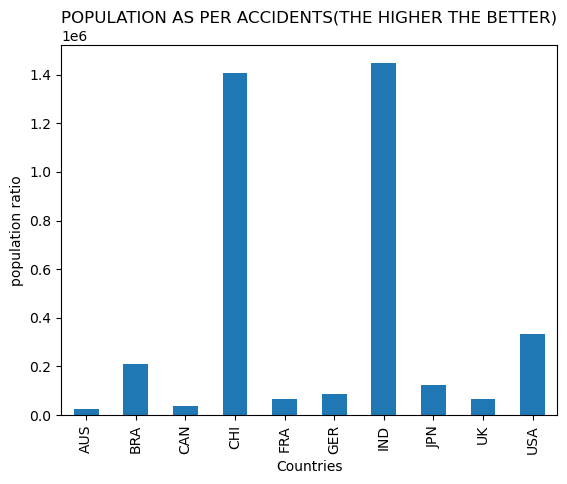

In [29]:
#Let's plot the result of the combined series and find the amount of accidents in 2023 in relation to their population
df1["Pop_per_accidents"].plot(kind="bar",title="POPULATION AS PER ACCIDENTS(THE HIGHER THE BETTER)",ylabel="population ratio")
plt.show()

It would be better using the a data showing amount of people that owns a vehicule per countries since probably a lot of people in 
China or India dont own a vehicule. But as per this plot, I would say that Canada and Australia are probably the worse.

In [31]:
accidents["Time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Time
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [32]:
def convert_to_time(time_str):
    if isinstance(time_str, str):  #If it's a string, convert it
        return datetime.strptime(time_str, "%H:%M").time()
    return time_str  #Return as is if it's already a datetime.time object

#Apply the conversion to the 'Time' column in accidents DataFrame
accidents["Time"] = accidents["Time"].apply(convert_to_time)

#Define rush hour ranges:
rush_hour_1_start= time(5, 0)  #05:00 AM
rush_hour_1_end= time(9, 0)    #09:00 AM
rush_hour_2_start= time(16, 0) #04:00 PM
rush_hour_2_end= time(19, 0)   #07:00 PM

#Function to check if a time is in one of the rush hours
def is_rush_hour(time_obj):
    return (rush_hour_1_start <= time_obj <= rush_hour_1_end) or (rush_hour_2_start <= time_obj <= rush_hour_2_end)

#Apply the function to identify rush hour times in accidents DataFrame
accidents["is_rush_hour"]=accidents["Time"].apply(is_rush_hour)

#Display the updated DataFrame
accidents

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause,Countries,is_rush_hour
0,b0dd6f57,2023-04-19,06:39:00,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving,IND,True
1,debfad09,2023-01-17,02:47:00,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving,BRA,False
2,6d69aa36,2024-04-09,02:55:00,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving,AUS,False
3,425bb1f0,2023-10-10,11:23:00,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving,JPN,False
4,90d5cf62,2023-01-02,12:07:00,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving,CHI,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2d26c7e2,2023-01-10,18:41:00,"Paris, France",-41.344055,109.335620,Storm,Wet,3,10,Distracted Driving,FRA,True
9996,4d236cfd,2023-04-04,16:48:00,"São Paulo, Brazil",-60.765148,-10.432225,Storm,Dry,3,9,Weather Conditions,BRA,True
9997,1d32722f,2024-09-30,14:43:00,"Beijing, China",-11.161278,-72.164379,Snow,Under Construction,2,3,Weather Conditions,CHI,False
9998,64722572,2024-10-27,18:34:00,"Sydney, Australia",-17.153524,20.803006,Storm,Under Construction,4,3,Drunk Driving,AUS,True


In [33]:
#For a more valid result, we are going to consider only monday to friday days
df_weekdays = accidents[accidents["Date"].dt.weekday < 5]

In [34]:
df_weekdays["is_rush_hour"].value_counts()

is_rush_hour
False    4947
True     2168
Name: count, dtype: int64

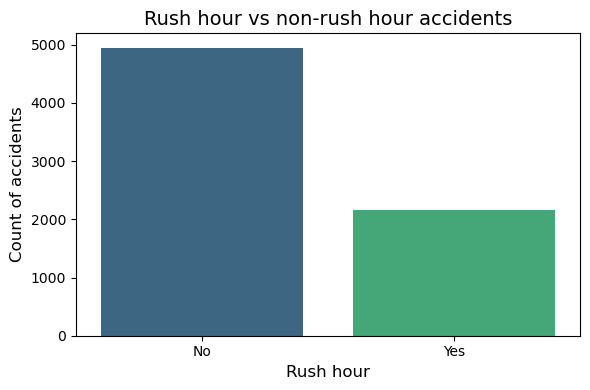

In [35]:
#Find where the most amount of accidents happen, rush hours or not

plt.figure(figsize=(6, 4))
ax=sns.countplot(x="is_rush_hour",hue="is_rush_hour",legend=False, data=df_weekdays, palette="viridis")

#Adding titles and labels
plt.title("Rush hour vs non-rush hour accidents", fontsize=14)
plt.xlabel("Rush hour", fontsize=12)
plt.ylabel("Count of accidents", fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(["No","Yes"])
plt.tight_layout()
plt.show()

Seems like the rush hours are not impacting the amount of accidents that much even when we take in consideration that rush hours include only approximately 7 hours in the day.

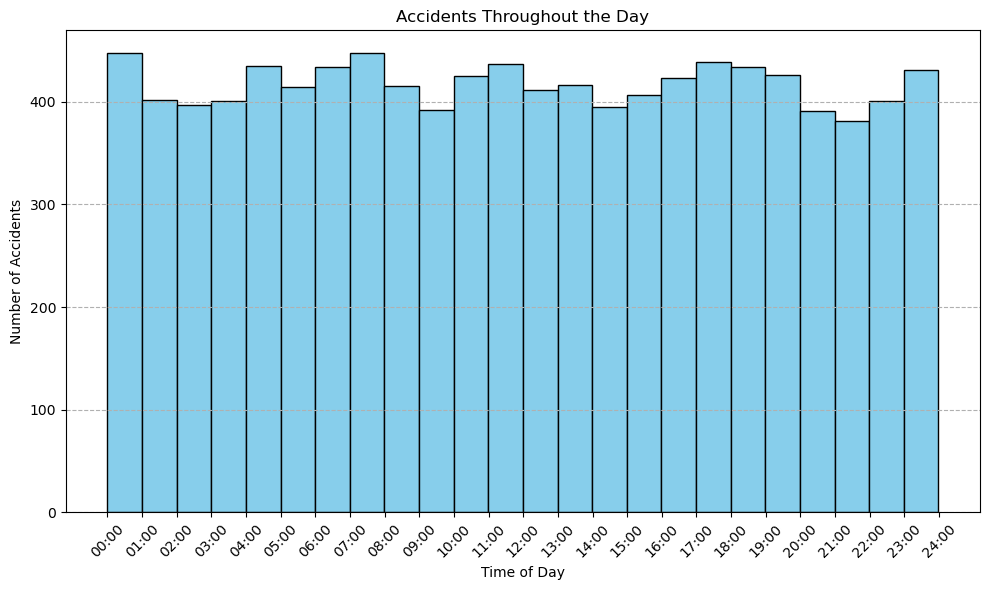

In [37]:
#let's find if the time of the day is impacting the amount of accidents in any day of the week.

def time_to_minutes(time_obj):
    return time_obj.hour * 60 + time_obj.minute

#Apply the conversion function to the "Time" column
accidents["Time_minutes"] = accidents["Time"].apply(time_to_minutes)

#Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(accidents["Time_minutes"], bins=24, edgecolor="black", color="skyblue")
plt.title("Accidents Throughout the Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")

#Display time on x-axis as hours (00:00, 01:00, ...) for every hours
plt.xticks(range(0, 1441, 60), [f'{i//60:02}:00' for i in range(0, 1441, 60)], rotation=45)
plt.grid(True, axis="y", linestyle="--")

plt.tight_layout()
plt.show()

In conclusion, the data suggests a higher frequency of accidents during nighttime, rush hours, and lunch periods. However, these factors do not appear to have a significant impact on the overall accident rate.